<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_04/g)_TensorFlow_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##  Step 2: Generate 3-Variable Non-Linear Data

In [2]:
def generate_data(n_samples=1000):
    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-5, 5, n_samples)
    x3 = np.random.uniform(-5, 5, n_samples)

    y = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2) + np.random.normal(0, 0.2, n_samples)
    X = np.column_stack((x1, x2, x3)).astype(np.float32)
    y = y.reshape(-1, 1).astype(np.float32)
    return X, y

X_train, y_train = generate_data()


## Step 3: Define Model using Functional API

In [3]:
from tensorflow.keras.layers import Input, Dense, ReLU
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
x = Dense(64)(inputs)
x = ReLU()(x)
x = Dense(32)(x)
x = ReLU()(x)
outputs = Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)


## Step 4: Compile and Train

In [4]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 221.7928
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 161.1441
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94.4880
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.0791
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.3011
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.2724
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.8535
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.2130
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.1156
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.3040
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.8315
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.1702
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.7599
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.0173
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

## Step 5: Plot Loss Curve

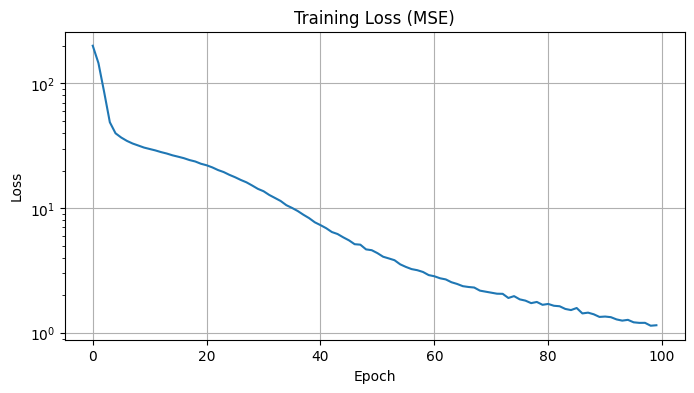

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.title("Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.grid(True)
plt.show()


## Step 6: Evaluate and Predict

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


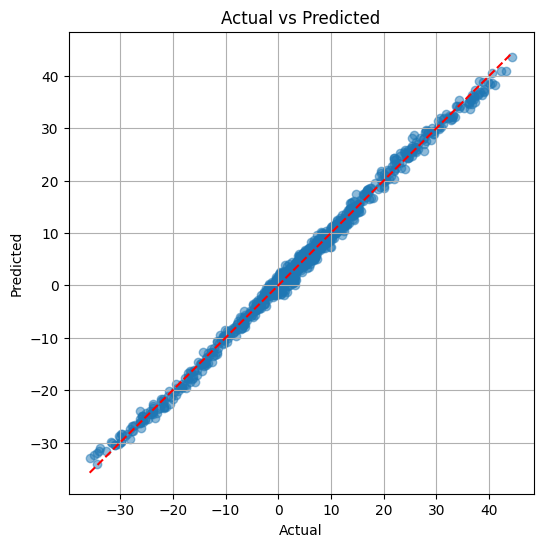

In [6]:
y_pred = model.predict(X_train)

plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


##  Step 7: 4D Plot of Predictions

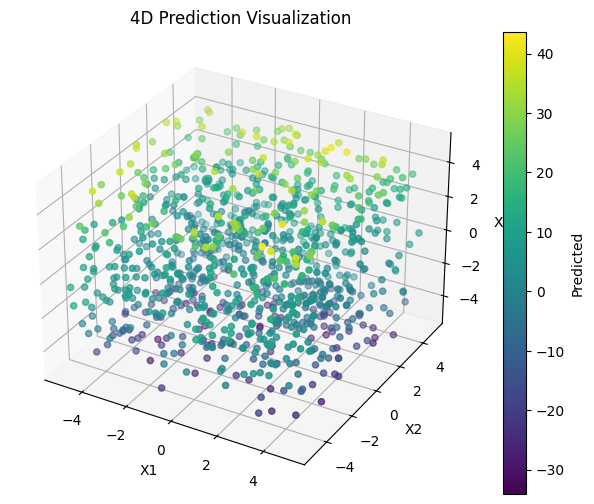

In [7]:
def plot_4d(X, y_pred):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred[:, 0], cmap='viridis')
    plt.colorbar(scatter, label='Predicted')
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    ax.set_title("4D Prediction Visualization")
    plt.show()

plot_4d(X_train, y_pred)


## Step 8: Predict on Custom Test Points

In [8]:
def predict_custom(x1, x2, x3):
    sample = np.array([[x1, x2, x3]], dtype=np.float32)
    return model.predict(sample)[0][0]

test_points = [(-4, -4, -4), (0, 0, 0), (4, 4, 4)]
for x1, x2, x3 in test_points:
    pred = predict_custom(x1, x2, x3)
    actual = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    print(f"Input: ({x1}, {x2}, {x3}) → Prediction: {pred:.3f}, Actual: {actual:.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Input: (-4, -4, -4) → Prediction: -10.487, Actual: -10.644
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Input: (0, 0, 0) → Prediction: -1.463, Actual: 1.000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Input: (4, 4, 4) → Prediction: 25.852, Actual: 24.729
